<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Multi_Linear_Regression_Boston_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sys
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preperation

In [3]:
boston_data = load_boston()

In [4]:
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.shape

(506, 13)

In [7]:
x = df

In [8]:
y = boston_data.target #defining target from sklearn dataset

In [9]:
y = y.reshape((-1,1))
ones = np.ones((len(x),1))
X = StandardScaler().fit_transform(x)

X.shape

(506, 13)

In [10]:
X = np.append(X,ones,axis=1)

## Defining Cost Function

In [11]:
def compute_cost(X,y,theta):
  m = len(y)
  return  (1/(2*m))*np.sum(np.square((X.dot(theta))-y))

## Defining Optimization Method

In [12]:
def gradient(X,y,theta,alpha,iteration):
  m=len(y)
  cost=[]
  for i in range(iteration):
    theta = theta - ((alpha/m) * (X.T.dot((np.subtract(X.dot(theta),y)))))
    cost.append(compute_cost(X,y,theta))
  return theta,cost

## Initialization

In [13]:
theta = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
(new_theta,last_cost) = gradient(X,y,theta,0.01,5000)

## Result Visualization

Text(0.5, 1.0, 'Cost versus Iteration')

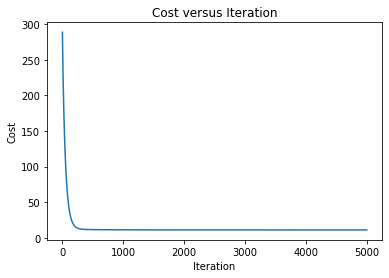

In [14]:
plt.plot(range(5000), last_cost)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Cost versus Iteration')

## Hypothesis parameters

In [15]:
new_theta

array([[-9.21597716e-01],
       [ 1.07007562e+00],
       [ 1.05469840e-01],
       [ 6.86800441e-01],
       [-2.05006613e+00],
       [ 2.68075474e+00],
       [ 1.39444430e-02],
       [-3.10628281e+00],
       [ 2.57282283e+00],
       [-1.97535499e+00],
       [-2.05719700e+00],
       [ 8.48665373e-01],
       [-3.74016957e+00],
       [ 2.25328063e+01]])

In [ ]:
ones = np.ones((len(x),1))
X_predall = np.append(X,ones,axis=1)

## Prediction

In [17]:
R = X.dot(new_theta)

## Checking R2 score

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y,R)

0.7406277070275858